# Name: Ritik Jangid

## Enrolment No.: 2018IMSCS017

## 1. Preprocessing on the dataset

In [1]:
# necessary imports
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
sns.set()
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt 
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
# Display all the columns of the dataframe
pd.pandas.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('data/golf-dataset.csv')
df.head()

,Outlook,Temp,Humidity,Windy,Decision
0,Rainy,Hot,High,False,No
1,Rainy,Hot,High,True,No
2,Overcast,Hot,High,False,Yes
3,Sunny,Mild,High,False,Yes
4,Sunny,Cool,Normal,False,Yes


In [3]:
df.dtypes

Outlook     object
Temp        object
Humidity    object
Windy         bool
Decision    object
dtype: object

In [4]:
# Import label encoder
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

df['Outlook']= label_encoder.fit_transform(df['Outlook'])
df['Temp']= label_encoder.fit_transform(df['Temp'])
df['Humidity']= label_encoder.fit_transform(df['Humidity'])
df['Decision']= label_encoder.fit_transform(df['Decision'])

In [5]:
df.head()

,Outlook,Temp,Humidity,Windy,Decision
0,1,1,0,False,0
1,1,1,0,True,0
2,0,1,0,False,1
3,2,2,0,False,1
4,2,0,1,False,1


In [6]:
X = df.drop(columns = ['Decision'])
y = df['Decision']

In [7]:
# splitting the data into testing and training data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## 2. Decision Tree using ID3

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

dtc = DecisionTreeClassifier(criterion='entropy')
dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)

dtc_train_acc = accuracy_score(y_train, dtc.predict(X_train))
dtc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy of Decision Tree Model is {dtc_train_acc}")
print(f"Test Accuracy of Decision Tree Model is {dtc_test_acc}")

Training Accuracy of Decision Tree Model is 1.0
Test Accuracy of Decision Tree Model is 0.5


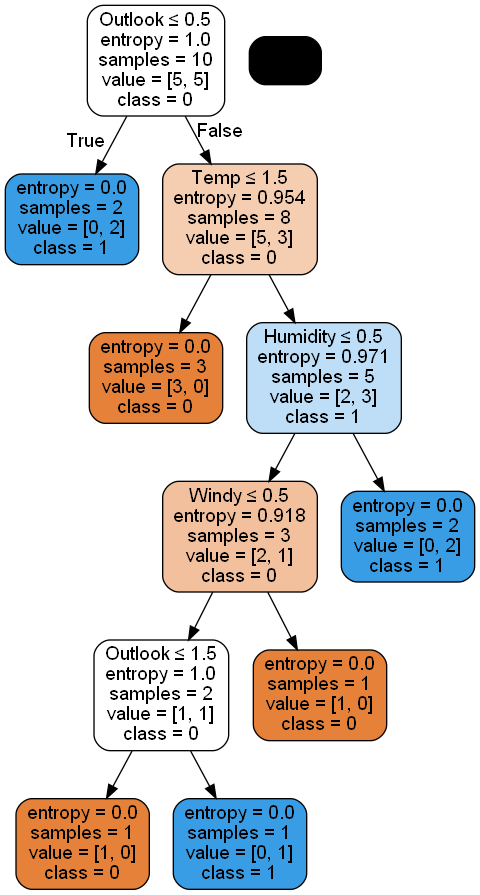

In [9]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

feature_cols = ['Outlook','Temp','Humidity','Windy']

dot_data = StringIO()

export_graphviz(dtc, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('data.png')
Image(graph.create_png())

## 3. Decision Tree using CART

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)

dtc_train_acc = accuracy_score(y_train, dtc.predict(X_train))
dtc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy of Decision Tree Model is {dtc_train_acc}")
print(f"Test Accuracy of Decision Tree Model is {dtc_test_acc}")

Training Accuracy of Decision Tree Model is 1.0
Test Accuracy of Decision Tree Model is 0.5


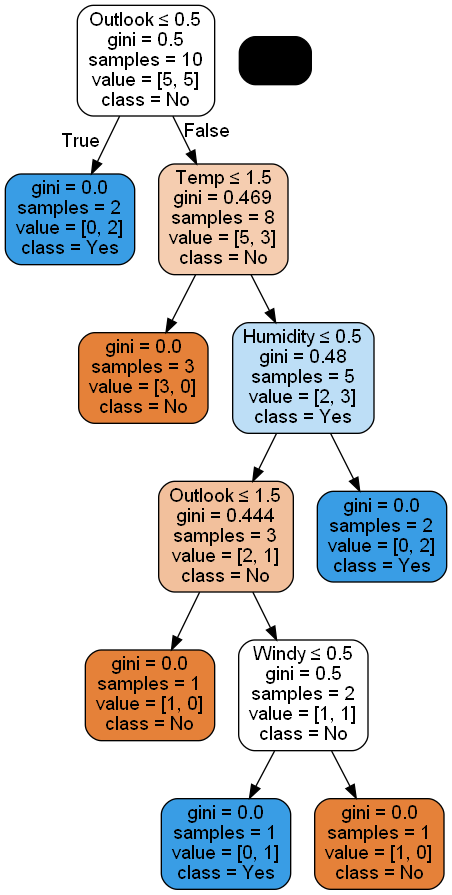

In [11]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

feature_cols = ['Outlook','Temp','Humidity','Windy']

dot_data = StringIO()

export_graphviz(dtc, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['No','Yes'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('data.png')
Image(graph.create_png())

## 4. Decision Tree using C 4.5

In [17]:
from chefboost import Chefboost as chef

In [18]:
config={'algorithm ':' (C4.5)'}

In [19]:
model = chef.fit(df,config)

[INFO]:  2 CPU cores will be allocated in parallel running
That's why, the algorithm is set to Regression to handle the data set.
Regression  tree is going to be built...
-------------------------
finished in  0.8205151557922363  seconds
-------------------------
Evaluate  train set
-------------------------
MAE:  0.16666666666666669
MSE:  0.08333333333333334
RMSE:  0.2886751345948129
RAE:  0.36004114991154784
RRSE:  0.6024640760767094
Mean:  0.6428571428571429
MAE / Mean:  25.925925925925927 %
RMSE / Mean:  44.90502093697089 %


## 5. Implementing Apriori Algorithm

In [40]:
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns

In [41]:
df = pd.read_csv('Data/G.csv')
df.head()

,Item(s),Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,...,Item 23,Item 24,Item 25,Item 26,Item 27,Item 28,Item 29,Item 30,Item 31,Item 32
0,4,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
df.shape

(9835, 33)

In [45]:
trans = []
for i in range(0, 5000):
  trans.append([str(df.values[i,j]) for j in range(1, 33)])

In [46]:
from apyori import apriori
rules = apriori(transactions = trans, min_support = 0.003, min_confidence = 0.2, min_lift = 3, min_length = 2, max_length = 2)

In [47]:
print(rules)

<generator object apriori at 0x000001D32DF759A0>


In [48]:
output = list(rules) # returns a non-tabular output
# putting output into a pandas dataframe
def inspect(output):
    lhs         = [tuple(result[2][0][0])[0] for result in output]
    rhs         = [tuple(result[2][0][1])[0] for result in output]
    support    = [result[1] for result in output]
    confidence = [result[2][0][2] for result in output]
    lift       = [result[2][0][3] for result in output]
    return list(zip(lhs, rhs, support, confidence, lift))
result = pd.DataFrame(inspect(output), columns = ['Left_Hand_Side', 'Right_Hand_Side', 'Support', 'Confidence', 'Lift'])

In [49]:
result.head()

,Left_Hand_Side,Right_Hand_Side,Support,Confidence,Lift
0,baking powder,domestic eggs,0.0040,0.208333,3.147029
1,baking powder,sugar,0.0048,0.250000,6.830601
2,baking powder,whipped/sour cream,0.0064,0.333333,4.385965
3,berries,whipped/sour cream,0.0088,0.287582,3.783970
4,liquor,bottled beer,0.0042,0.396226,4.716981


In [50]:
result.nlargest(n = 10, columns = 'Lift')

,Left_Hand_Side,Right_Hand_Side,Support,Confidence,Lift
9,flour,sugar,0.0054,0.296703,8.106647
15,processed cheese,white bread,0.0048,0.315789,7.483163
1,baking powder,sugar,0.0048,0.250000,6.830601
13,ham,white bread,0.0054,0.204545,4.847049
4,liquor,bottled beer,0.0042,0.396226,4.716981
2,baking powder,whipped/sour cream,0.0064,0.333333,4.385965
8,flour,margarine,0.0046,0.252747,3.999165
14,roll products,margarine,0.0030,0.250000,3.955696
11,mustard,frankfurter,0.0032,0.242424,3.935458
3,berries,whipped/sour cream,0.0088,0.287582,3.783970


## 6. Implementing Naive Bayes

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### 1. Golf Data

### Read Data

In [43]:
df = pd.read_csv('data/golf-dataset.csv')
df.head()

,Outlook,Temp,Humidity,Windy,Decision
0,Rainy,Hot,High,False,No
1,Rainy,Hot,High,True,No
2,Overcast,Hot,High,False,Yes
3,Sunny,Mild,High,False,Yes
4,Sunny,Cool,Normal,False,Yes


In [44]:
df.dtypes

Outlook     object
Temp        object
Humidity    object
Windy         bool
Decision    object
dtype: object

### Data Preprocessing

In [45]:
# Import label encoder
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

df['Outlook']= label_encoder.fit_transform(df['Outlook'])
df['Temp']= label_encoder.fit_transform(df['Temp'])
df['Humidity']= label_encoder.fit_transform(df['Humidity'])
df['Decision']= label_encoder.fit_transform(df['Decision'])

In [46]:
df.head()

,Outlook,Temp,Humidity,Windy,Decision
0,1,1,0,False,0
1,1,1,0,True,0
2,0,1,0,False,1
3,2,2,0,False,1
4,2,0,1,False,1


In [47]:
X = df.drop(columns = ['Decision'])
y = df['Decision']

In [48]:
# splitting the data into testing and training data.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

### Apply Naive Bayes


In [49]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [50]:
y_pred = classifier.predict(X_test)

In [51]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)

In [52]:
print("Accuracy: ", ac)

Accuracy:  0.25


<AxesSubplot:>

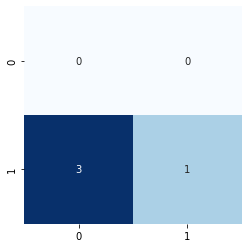

In [53]:
import seaborn as sn
sn.heatmap(cm, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)

### 2. Customer Data (Kaggle)

### Read Data

In [54]:
df = pd.read_csv('data/kaggle/customer_data.csv')
df.head()

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
0,1,54982665,5,1245.5,3,77000.0,2,15,5,109,5,151300,244.948974
1,0,59004779,4,1277.0,1,113000.0,2,8,-1,100,3,341759,207.173840
2,0,58990862,7,1298.0,1,110000.0,2,11,-1,101,5,72001,1.000000
3,1,58995168,7,1335.5,1,151000.0,2,11,5,110,3,60084,1.000000
4,0,54987320,7,NaN,2,59000.0,2,11,5,108,4,450081,197.403141


In [55]:
df.dtypes

label       int64
id          int64
fea_1       int64
fea_2     float64
fea_3       int64
fea_4     float64
fea_5       int64
fea_6       int64
fea_7       int64
fea_8       int64
fea_9       int64
fea_10      int64
fea_11    float64
dtype: object

### Data Preprocessing

In [56]:
df.isna().sum()

label       0
id          0
fea_1       0
fea_2     149
fea_3       0
fea_4       0
fea_5       0
fea_6       0
fea_7       0
fea_8       0
fea_9       0
fea_10      0
fea_11      0
dtype: int64

In [57]:
df.dropna(inplace=True)

In [58]:
df.tail()

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
1119,0,54985816,7,1320.5,3,108000.0,2,11,5,110,4,510068,248.997992
1120,0,58988196,5,1289.0,1,173000.0,2,15,5,112,3,350702,200.000000
1122,0,58995381,7,1220.0,3,76000.0,2,11,2,90,5,71002,1.000000
1123,0,58998054,4,1250.0,3,137000.0,2,8,5,90,5,72000,1.000000
1124,0,54989781,4,1415.0,3,93000.0,2,8,5,113,4,151300,273.861279


In [59]:
df.dtypes

label       int64
id          int64
fea_1       int64
fea_2     float64
fea_3       int64
fea_4     float64
fea_5       int64
fea_6       int64
fea_7       int64
fea_8       int64
fea_9       int64
fea_10      int64
fea_11    float64
dtype: object

In [60]:
# Import MinMaxScaler
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
minMaxScaler = preprocessing.MinMaxScaler()

df[df.columns] = minMaxScaler.fit_transform(df[df.columns])

In [61]:
X = df.drop(columns = ['label'])
y = df['label']

In [62]:
# splitting the data into testing and training data.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

### Apply Naive Bayes


In [63]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [64]:
y_pred = classifier.predict(X_test)

In [65]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)

In [66]:
print("Accuracy: ", ac)

Accuracy:  0.8114754098360656


<AxesSubplot:>

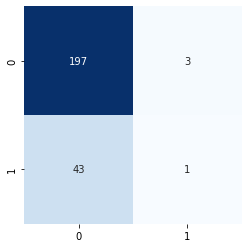

In [67]:
import seaborn as sn
sn.heatmap(cm, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)

## 7. Implementing KNN

In [97]:
import numpy as np
import matplotlib.pyplot as plt
import pandas

### 1. Golf Data

### Read Data

In [98]:
df = pd.read_csv('data/golf-dataset.csv')
df.head()

,Outlook,Temp,Humidity,Windy,Decision
0,Rainy,Hot,High,False,No
1,Rainy,Hot,High,True,No
2,Overcast,Hot,High,False,Yes
3,Sunny,Mild,High,False,Yes
4,Sunny,Cool,Normal,False,Yes


In [99]:
df.dtypes

Outlook     object
Temp        object
Humidity    object
Windy         bool
Decision    object
dtype: object

### Data Preprocessing

In [100]:
# Import label encoder
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

df['Outlook']= label_encoder.fit_transform(df['Outlook'])
df['Temp']= label_encoder.fit_transform(df['Temp'])
df['Humidity']= label_encoder.fit_transform(df['Humidity'])
df['Decision']= label_encoder.fit_transform(df['Decision'])

In [101]:
df.head()

,Outlook,Temp,Humidity,Windy,Decision
0,1,1,0,False,0
1,1,1,0,True,0
2,0,1,0,False,1
3,2,2,0,False,1
4,2,0,1,False,1


In [102]:
X = df.drop(columns = ['Decision'])
y = df['Decision']

In [103]:
# splitting the data into testing and training data.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

### Apply KNN


In [104]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=2)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [105]:
y_pred = knn_classifier.predict(X_test)

In [106]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)

In [107]:
print("Accuracy: ", ac)

Accuracy:  0.25


<AxesSubplot:>

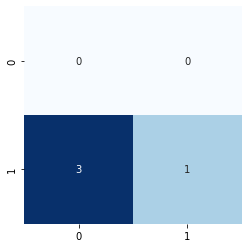

In [108]:
import seaborn as sn
sn.heatmap(cm, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)

### 2. Customer Data (Kaggle)

### Read Data

In [109]:
df = pd.read_csv('data/kaggle/customer_data.csv')
df.head()

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
0,1,54982665,5,1245.5,3,77000.0,2,15,5,109,5,151300,244.948974
1,0,59004779,4,1277.0,1,113000.0,2,8,-1,100,3,341759,207.173840
2,0,58990862,7,1298.0,1,110000.0,2,11,-1,101,5,72001,1.000000
3,1,58995168,7,1335.5,1,151000.0,2,11,5,110,3,60084,1.000000
4,0,54987320,7,NaN,2,59000.0,2,11,5,108,4,450081,197.403141


In [110]:
df.dtypes

label       int64
id          int64
fea_1       int64
fea_2     float64
fea_3       int64
fea_4     float64
fea_5       int64
fea_6       int64
fea_7       int64
fea_8       int64
fea_9       int64
fea_10      int64
fea_11    float64
dtype: object

### Data Preprocessing

In [111]:
df.isna().sum()

label       0
id          0
fea_1       0
fea_2     149
fea_3       0
fea_4       0
fea_5       0
fea_6       0
fea_7       0
fea_8       0
fea_9       0
fea_10      0
fea_11      0
dtype: int64

In [112]:
df.dropna(inplace=True)

In [113]:
df.tail()

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
1119,0,54985816,7,1320.5,3,108000.0,2,11,5,110,4,510068,248.997992
1120,0,58988196,5,1289.0,1,173000.0,2,15,5,112,3,350702,200.000000
1122,0,58995381,7,1220.0,3,76000.0,2,11,2,90,5,71002,1.000000
1123,0,58998054,4,1250.0,3,137000.0,2,8,5,90,5,72000,1.000000
1124,0,54989781,4,1415.0,3,93000.0,2,8,5,113,4,151300,273.861279


In [114]:
df.dtypes

label       int64
id          int64
fea_1       int64
fea_2     float64
fea_3       int64
fea_4     float64
fea_5       int64
fea_6       int64
fea_7       int64
fea_8       int64
fea_9       int64
fea_10      int64
fea_11    float64
dtype: object

In [115]:
# Import MinMaxScaler
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
minMaxScaler = preprocessing.MinMaxScaler()

df[df.columns] = minMaxScaler.fit_transform(df[df.columns])

In [116]:
X = df.drop(columns = ['label'])
y = df['label']

In [117]:
# splitting the data into testing and training data.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

### Apply KNN


In [118]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=10)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [119]:
y_pred = knn_classifier.predict(X_test)

In [120]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)

In [121]:
print("Accuracy: ", ac)

Accuracy:  0.819672131147541


<AxesSubplot:>

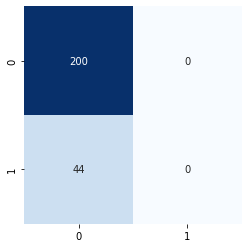

In [122]:
import seaborn as sn
sn.heatmap(cm, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)

## 8. Implementing SVM

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### 1. Golf Data

### Read Data

In [19]:
df = pd.read_csv('data/golf-dataset.csv')
df.head()

,Outlook,Temp,Humidity,Windy,Decision
0,Rainy,Hot,High,False,No
1,Rainy,Hot,High,True,No
2,Overcast,Hot,High,False,Yes
3,Sunny,Mild,High,False,Yes
4,Sunny,Cool,Normal,False,Yes


In [20]:
df.dtypes

Outlook     object
Temp        object
Humidity    object
Windy         bool
Decision    object
dtype: object

### Data Preprocessing

In [21]:
# Import label encoder
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

df['Outlook']= label_encoder.fit_transform(df['Outlook'])
df['Temp']= label_encoder.fit_transform(df['Temp'])
df['Humidity']= label_encoder.fit_transform(df['Humidity'])
df['Decision']= label_encoder.fit_transform(df['Decision'])

In [22]:
df.head()

,Outlook,Temp,Humidity,Windy,Decision
0,1,1,0,False,0
1,1,1,0,True,0
2,0,1,0,False,1
3,2,2,0,False,1
4,2,0,1,False,1


In [23]:
X = df.drop(columns = ['Decision'])
y = df['Decision']

In [24]:
# splitting the data into testing and training data.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

### Apply Support Vector Classifier


In [25]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(kernel='linear')

In [26]:
y_pred = svclassifier.predict(X_test)

In [27]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)

In [28]:
print("Accuracy: ", ac)

Accuracy:  0.75


<AxesSubplot:>

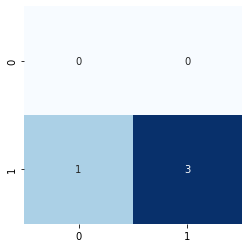

In [29]:
import seaborn as sn
sn.heatmap(cm, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)

### 2. Customer Data (Kaggle)

### Read Data

In [30]:
df = pd.read_csv('data/kaggle/customer_data.csv')
df.head()

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
0,1,54982665,5,1245.5,3,77000.0,2,15,5,109,5,151300,244.948974
1,0,59004779,4,1277.0,1,113000.0,2,8,-1,100,3,341759,207.173840
2,0,58990862,7,1298.0,1,110000.0,2,11,-1,101,5,72001,1.000000
3,1,58995168,7,1335.5,1,151000.0,2,11,5,110,3,60084,1.000000
4,0,54987320,7,NaN,2,59000.0,2,11,5,108,4,450081,197.403141


In [31]:
df.dtypes

label       int64
id          int64
fea_1       int64
fea_2     float64
fea_3       int64
fea_4     float64
fea_5       int64
fea_6       int64
fea_7       int64
fea_8       int64
fea_9       int64
fea_10      int64
fea_11    float64
dtype: object

### Data Preprocessing

In [32]:
df.isna().sum()

label       0
id          0
fea_1       0
fea_2     149
fea_3       0
fea_4       0
fea_5       0
fea_6       0
fea_7       0
fea_8       0
fea_9       0
fea_10      0
fea_11      0
dtype: int64

In [33]:
df.dropna(inplace=True)

In [34]:
df.tail()

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
1119,0,54985816,7,1320.5,3,108000.0,2,11,5,110,4,510068,248.997992
1120,0,58988196,5,1289.0,1,173000.0,2,15,5,112,3,350702,200.000000
1122,0,58995381,7,1220.0,3,76000.0,2,11,2,90,5,71002,1.000000
1123,0,58998054,4,1250.0,3,137000.0,2,8,5,90,5,72000,1.000000
1124,0,54989781,4,1415.0,3,93000.0,2,8,5,113,4,151300,273.861279


In [35]:
df.dtypes

label       int64
id          int64
fea_1       int64
fea_2     float64
fea_3       int64
fea_4     float64
fea_5       int64
fea_6       int64
fea_7       int64
fea_8       int64
fea_9       int64
fea_10      int64
fea_11    float64
dtype: object

In [36]:
# Import MinMaxScaler
from sklearn import preprocessing
 
minMaxScaler = preprocessing.MinMaxScaler()

df[df.columns] = minMaxScaler.fit_transform(df[df.columns])

In [37]:
X = df.drop(columns = ['label'])
y = df['label']

In [38]:
# splitting the data into testing and training data.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

### Apply Support Vector Classifier


In [68]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(kernel='linear')

In [69]:
y_pred = svclassifier.predict(X_test)

In [70]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)

In [71]:
print("Accuracy: ", ac)

Accuracy:  0.819672131147541


<AxesSubplot:>

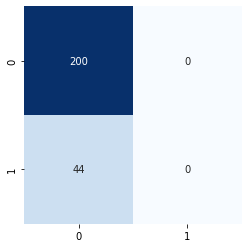

In [72]:
import seaborn as sn
sn.heatmap(cm, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)

## 9. Implementing K-Means Clustering Algorithm

In [196]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### 1. Social_Network_Ads Data

### Read Data

In [197]:
df = pd.read_csv('data/Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [198]:
df.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

### Data Preprocessing

In [199]:
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [200]:
df = df.drop(columns = ["User ID"])

In [201]:
# Import label encoder
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Gender']= label_encoder.fit_transform(df['Gender'])

In [202]:
# apply minmax scalling
minMaxScaler = preprocessing.MinMaxScaler()
df[df.columns] = minMaxScaler.fit_transform(df[df.columns])

In [203]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1.0,0.023810,0.029630,0.0
1,1.0,0.404762,0.037037,0.0
2,0.0,0.190476,0.207407,0.0
3,0.0,0.214286,0.311111,0.0
4,1.0,0.023810,0.451852,0.0


In [204]:
y = df['Purchased'].to_numpy()
x = df.iloc[:, [0, 1, 2]].values

### Apply K Means


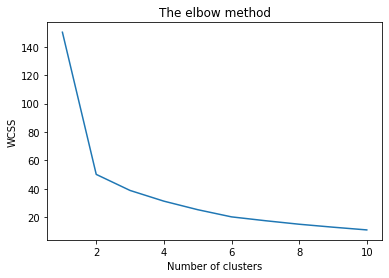

In [205]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [206]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

In [207]:
len(y_kmeans)

400

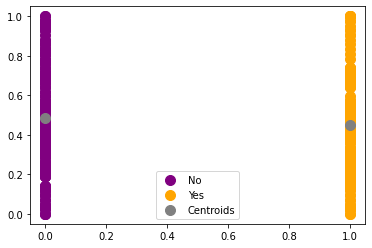

In [208]:
#Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'No')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Yes')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'grey', label = 'Centroids')

plt.legend()

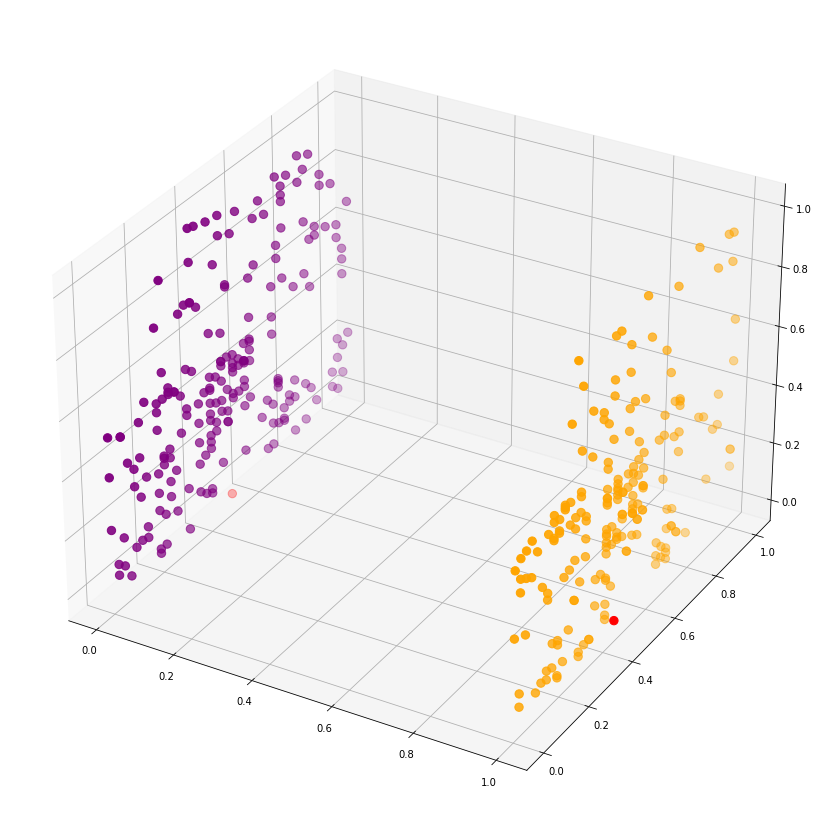

In [209]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], x[y_kmeans == 0, 2], s = 70, c = 'purple', marker='o', label='Cluster 1')
ax.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], x[y_kmeans == 1, 2], s = 70, c = 'orange', marker='o', label='Cluster 2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 70, c = 'red', label = 'Centroids')

plt.show()

In [210]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y, y_kmeans)
ac = accuracy_score(y,y_kmeans)

In [211]:
print("Accuracy: ", ac)

Accuracy:  0.4825


<AxesSubplot:>

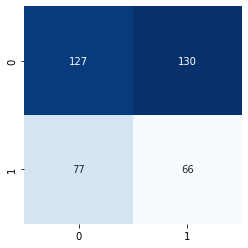

In [212]:
import seaborn as sn
sn.heatmap(cm, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)

### 2. Mall Customers Data

### Read Data

In [213]:
df = pd.read_csv('data/Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [214]:
df.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

### Data Preprocessing

In [215]:
df.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [216]:
df = df.drop(columns = ["CustomerID"])

In [217]:
# Import label encoder
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Genre']= label_encoder.fit_transform(df['Genre'])

In [218]:
# apply minmax scalling
minMaxScaler = preprocessing.MinMaxScaler()
df[df.columns] = minMaxScaler.fit_transform(df[df.columns])

In [219]:
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,0.019231,0.000000,0.387755
1,1.0,0.057692,0.000000,0.816327
2,0.0,0.038462,0.008197,0.051020
3,0.0,0.096154,0.008197,0.775510
4,0.0,0.250000,0.016393,0.397959


In [220]:
x = df.values

### Apply K Means

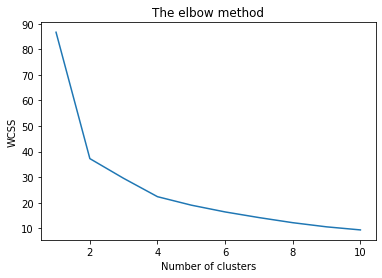

In [221]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [222]:
# so taking number of clusters as 2
kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

In [223]:
len(y_kmeans)

200

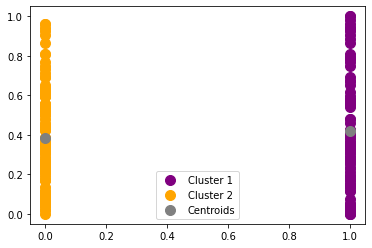

In [224]:
#Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Cluster 2')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'grey', label = 'Centroids')

plt.legend()


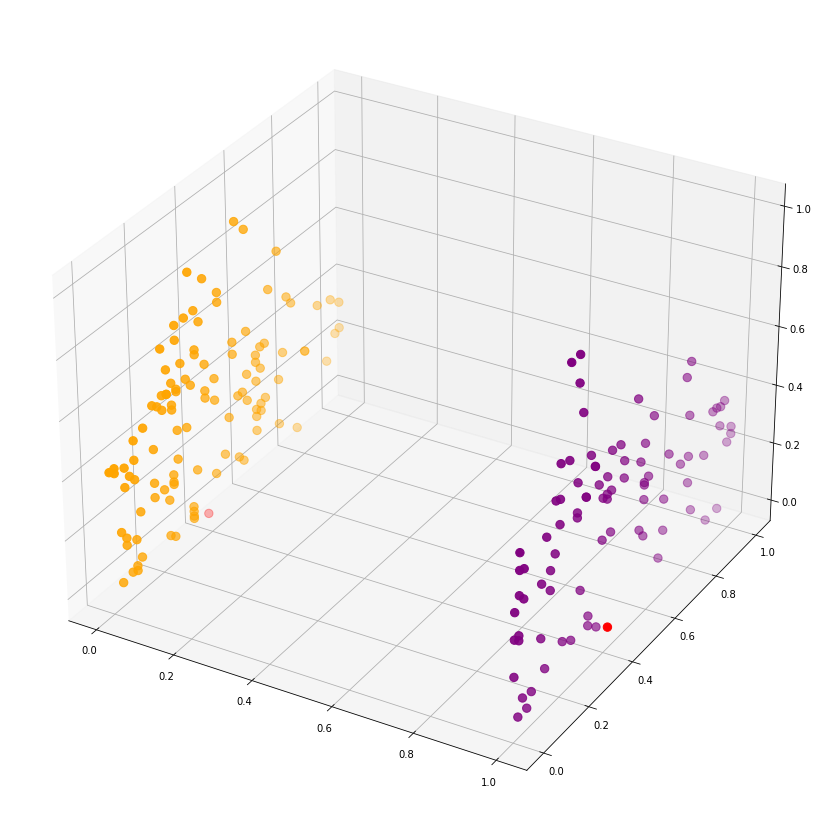

In [225]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], x[y_kmeans == 0, 2], s = 70, c = 'purple', marker='o', label='Cluster 1')
ax.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], x[y_kmeans == 1, 2], s = 70, c = 'orange', marker='o', label='Cluster 2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 70, c = 'red', label = 'Centroids')

plt.show()

## 10. Implementing k-mediods Clustering Algorithm

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### 1. Social_Network_Ads Data

### Read Data

In [4]:
df = pd.read_csv('data/Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
df.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

### Data Preprocessing

In [6]:
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [7]:
df = df.drop(columns = ["User ID"])

In [8]:
# Import label encoder
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Gender']= label_encoder.fit_transform(df['Gender'])

In [9]:
# apply minmax scalling
minMaxScaler = preprocessing.MinMaxScaler()
df[df.columns] = minMaxScaler.fit_transform(df[df.columns])

In [10]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1.0,0.023810,0.029630,0.0
1,1.0,0.404762,0.037037,0.0
2,0.0,0.190476,0.207407,0.0
3,0.0,0.214286,0.311111,0.0
4,1.0,0.023810,0.451852,0.0


In [11]:
y = df['Purchased'].to_numpy()
x = df.iloc[:, [0, 1, 2]].values

### Apply K-Medoid


In [3]:
from sklearn_extra.cluster import KMedoids

In [12]:
kmed = KMedoids(n_clusters=2)
y_kmed = kmed.fit_predict(x)

In [13]:
len(y_kmed)

400

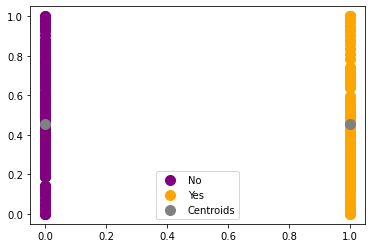

In [14]:
#Visualising the clusters
plt.scatter(x[y_kmed == 0, 0], x[y_kmed == 0, 1], s = 100, c = 'purple', label = 'No')
plt.scatter(x[y_kmed == 1, 0], x[y_kmed == 1, 1], s = 100, c = 'orange', label = 'Yes')

#Plotting the centroids of the clusters
plt.scatter(kmed.cluster_centers_[:, 0], kmed.cluster_centers_[:,1], s = 100, c = 'grey', label = 'Centroids')

plt.legend()


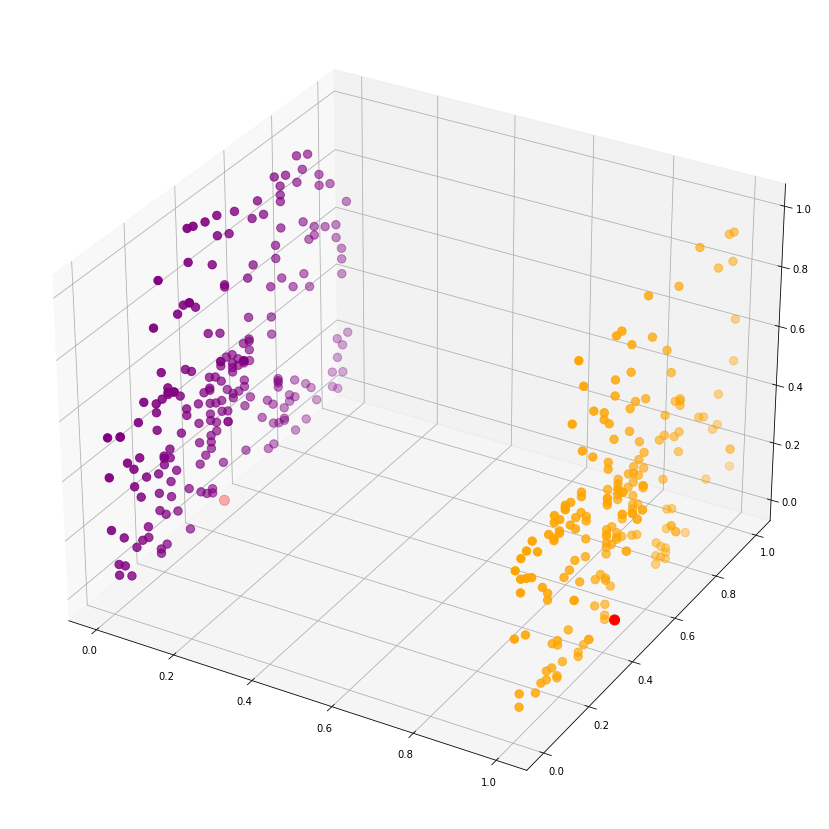

In [16]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x[y_kmed == 0, 0], x[y_kmed == 0, 1], x[y_kmed == 0, 2], s = 70, c = 'purple', marker='o', label='Cluster 1')
ax.scatter(x[y_kmed == 1, 0], x[y_kmed == 1, 1], x[y_kmed == 1, 2], s = 70, c = 'orange', marker='o', label='Cluster 2')
plt.scatter(kmed.cluster_centers_[:, 0], kmed.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.show()

In [18]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y, y_kmed)
ac = accuracy_score(y,y_kmed)

In [19]:
print("Accuracy: ", ac)

Accuracy:  0.4825


<AxesSubplot:>

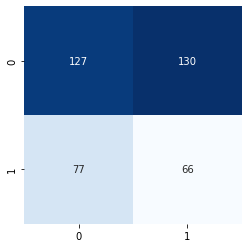

In [20]:
import seaborn as sn
sn.heatmap(cm, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)

### 2. Mall Customers Data

### Read Data

In [21]:
df = pd.read_csv('data/Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [22]:
df.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

### Data Preprocessing

In [23]:
df.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [24]:
df = df.drop(columns = ["CustomerID"])

In [25]:
# Import label encoder
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Genre']= label_encoder.fit_transform(df['Genre'])

In [26]:
# apply minmax scalling
minMaxScaler = preprocessing.MinMaxScaler()
df[df.columns] = minMaxScaler.fit_transform(df[df.columns])

In [27]:
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,0.019231,0.000000,0.387755
1,1.0,0.057692,0.000000,0.816327
2,0.0,0.038462,0.008197,0.051020
3,0.0,0.096154,0.008197,0.775510
4,0.0,0.250000,0.016393,0.397959


In [28]:
x = df.values

### Apply K-Medoids

In [29]:
kmed = KMedoids(n_clusters=2)
y_kmed = kmed.fit_predict(x)

In [30]:
len(y_kmed)

200

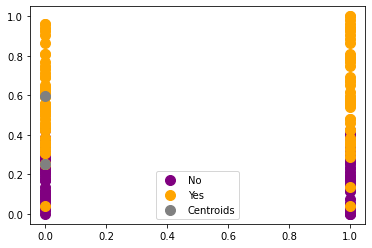

In [31]:
#Visualising the clusters
plt.scatter(x[y_kmed == 0, 0], x[y_kmed == 0, 1], s = 100, c = 'purple', label = 'No')
plt.scatter(x[y_kmed == 1, 0], x[y_kmed == 1, 1], s = 100, c = 'orange', label = 'Yes')

#Plotting the centroids of the clusters
plt.scatter(kmed.cluster_centers_[:, 0], kmed.cluster_centers_[:,1], s = 100, c = 'grey', label = 'Centroids')

plt.legend()


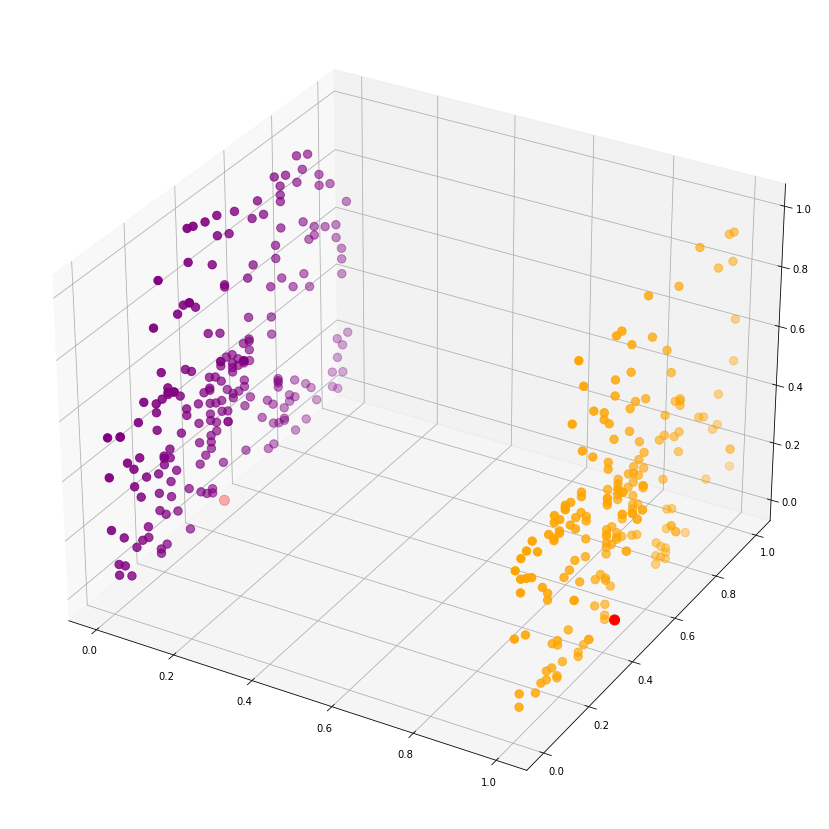

In [ ]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x[y_kmed == 0, 0], x[y_kmed == 0, 1], x[y_kmed == 0, 2], s = 70, c = 'purple', marker='o', label='Cluster 1')
ax.scatter(x[y_kmed == 1, 0], x[y_kmed == 1, 1], x[y_kmed == 1, 2], s = 70, c = 'orange', marker='o', label='Cluster 2')
plt.scatter(kmed.cluster_centers_[:, 0], kmed.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.show()

## 11. Implementing Agglomerative Clustering Algorithm

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### 1. Social_Network_Ads Data

### Read Data

In [2]:
df = pd.read_csv('data/Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
df.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

### Data Preprocessing

In [4]:
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [5]:
df = df.drop(columns = ["User ID"])

In [6]:
# Import label encoder
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Gender']= label_encoder.fit_transform(df['Gender'])

In [7]:
# apply minmax scalling
minMaxScaler = preprocessing.MinMaxScaler()
df[df.columns] = minMaxScaler.fit_transform(df[df.columns])

In [8]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1.0,0.023810,0.029630,0.0
1,1.0,0.404762,0.037037,0.0
2,0.0,0.190476,0.207407,0.0
3,0.0,0.214286,0.311111,0.0
4,1.0,0.023810,0.451852,0.0


In [9]:
y = df['Purchased'].to_numpy()
x = df.iloc[:, [0, 1, 2]].values

### Apply Agglomerative clustering

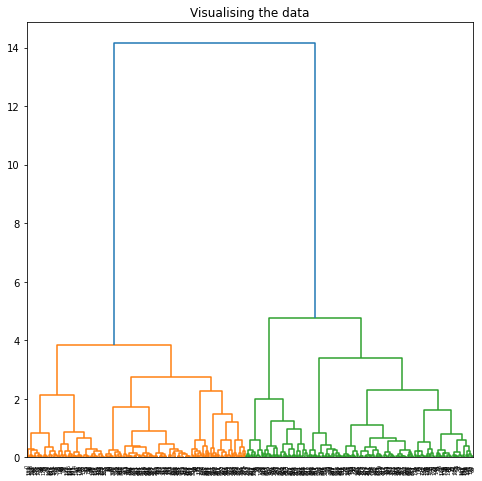

In [11]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize =(8, 8))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(x, method ='ward')))

In [14]:
from sklearn.cluster import AgglomerativeClustering


agg = AgglomerativeClustering(n_clusters = 2)

y_agg = agg.fit_predict(x)

In [15]:
len(y_agg)

400

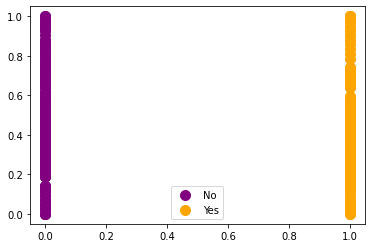

In [17]:
#Visualising the clusters
plt.scatter(x[y_agg == 0, 0], x[y_agg == 0, 1], s = 100, c = 'purple', label = 'No')
plt.scatter(x[y_agg == 1, 0], x[y_agg == 1, 1], s = 100, c = 'orange', label = 'Yes')

#Plotting the centroids of the clusters
# plt.scatter(agg.cluster_centers_[:, 0], agg.cluster_centers_[:,1], s = 100, c = 'grey', label = 'Centroids')

plt.legend()


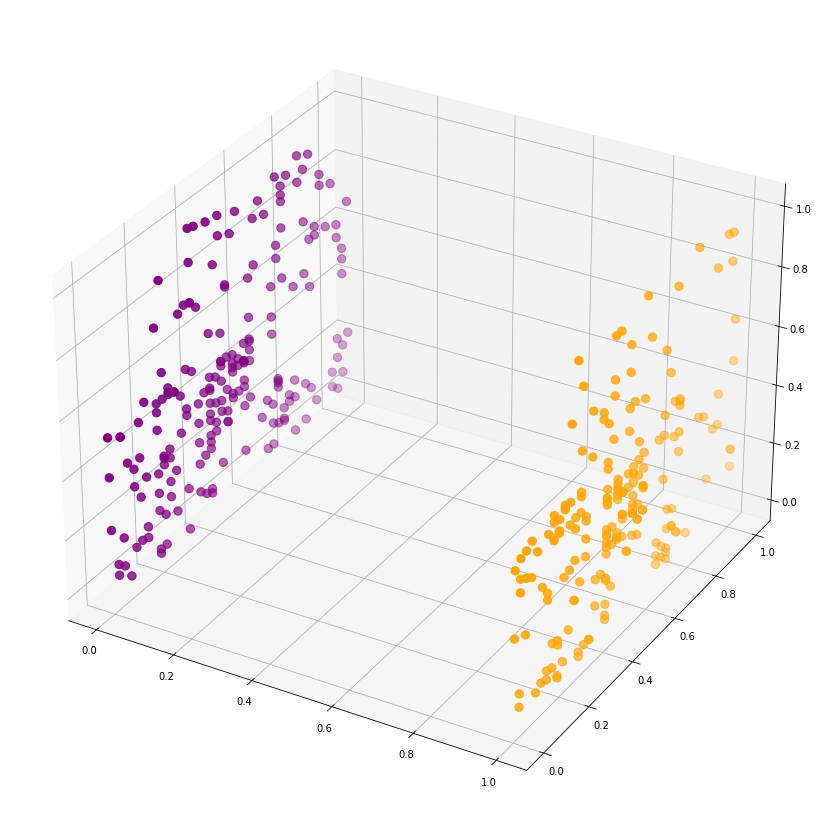

In [18]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x[y_agg == 0, 0], x[y_agg == 0, 1], x[y_agg == 0, 2], s = 70, c = 'purple', marker='o', label='Cluster 1')
ax.scatter(x[y_agg == 1, 0], x[y_agg == 1, 1], x[y_agg == 1, 2], s = 70, c = 'orange', marker='o', label='Cluster 2')
# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 70, c = 'red', label = 'Centroids')

plt.show()

In [21]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y, y_agg)
ac = accuracy_score(y,y_agg)

In [22]:
print("Accuracy: ", ac)

Accuracy:  0.4825


<AxesSubplot:>

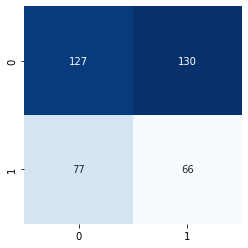

In [23]:
import seaborn as sn
sn.heatmap(cm, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)

### 2. Mall Customers Data

### Read Data

In [24]:
df = pd.read_csv('data/Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [25]:
df.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

### Data Preprocessing

In [26]:
df.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [27]:
df = df.drop(columns = ["CustomerID"])

In [28]:
# Import label encoder
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Genre']= label_encoder.fit_transform(df['Genre'])

In [29]:
# apply minmax scalling
minMaxScaler = preprocessing.MinMaxScaler()
df[df.columns] = minMaxScaler.fit_transform(df[df.columns])

In [30]:
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,0.019231,0.000000,0.387755
1,1.0,0.057692,0.000000,0.816327
2,0.0,0.038462,0.008197,0.051020
3,0.0,0.096154,0.008197,0.775510
4,0.0,0.250000,0.016393,0.397959


In [31]:
x = df.values

### Apply Agglomerative clustering

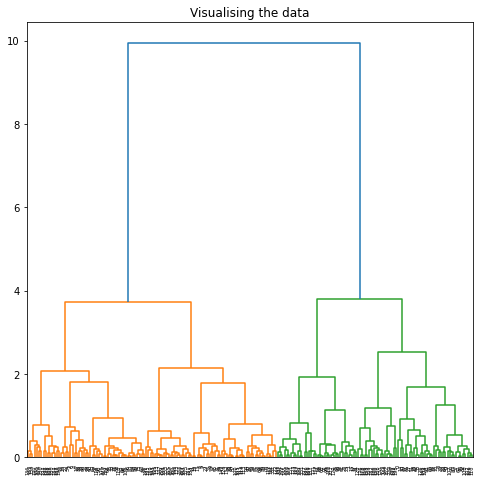

In [32]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize =(8, 8))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(x, method ='ward')))

In [33]:
from sklearn.cluster import AgglomerativeClustering
agg = AgglomerativeClustering(n_clusters = 2)
y_agg = agg.fit_predict(x)

In [34]:
len(y_agg)

200

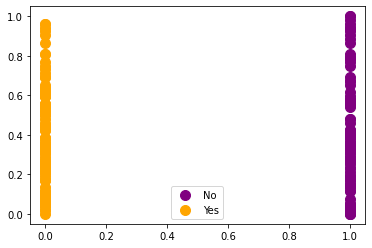

In [35]:
#Visualising the clusters
plt.scatter(x[y_agg == 0, 0], x[y_agg == 0, 1], s = 100, c = 'purple', label = 'No')
plt.scatter(x[y_agg == 1, 0], x[y_agg == 1, 1], s = 100, c = 'orange', label = 'Yes')

#Plotting the centroids of the clusters
# plt.scatter(agg.cluster_centers_[:, 0], agg.cluster_centers_[:,1], s = 100, c = 'grey', label = 'Centroids')

plt.legend()


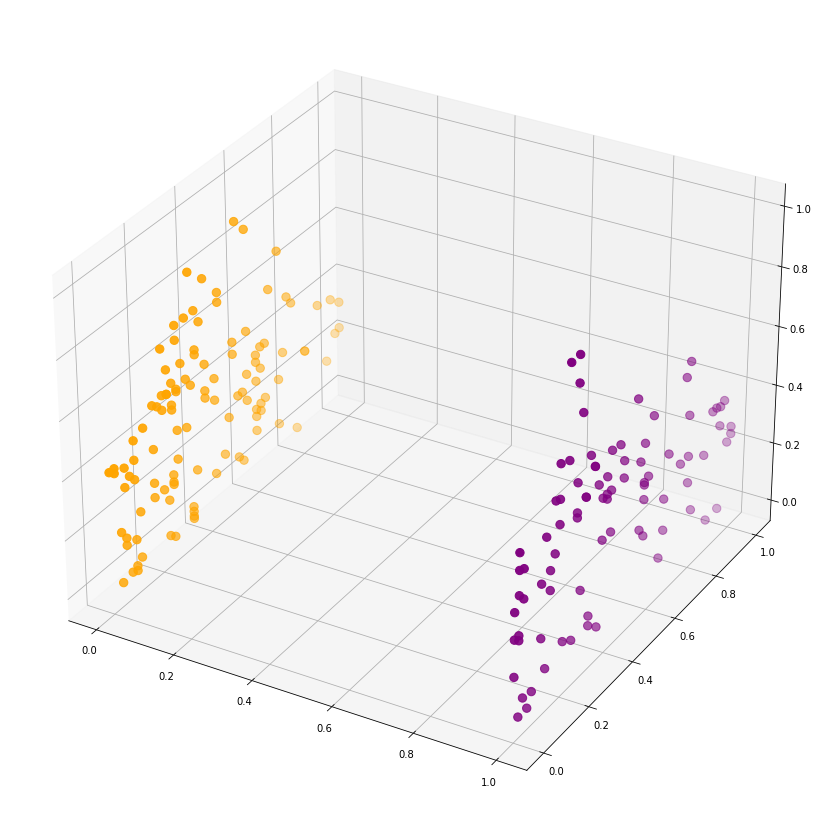

In [37]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x[y_agg == 0, 0], x[y_agg == 0, 1], x[y_agg == 0, 2], s = 70, c = 'purple', marker='o', label='Cluster 1')
ax.scatter(x[y_agg == 1, 0], x[y_agg == 1, 1], x[y_agg == 1, 2], s = 70, c = 'orange', marker='o', label='Cluster 2')

plt.show()

## 12. Implementing DB-SCAN Algorithm

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### 1. Social_Network_Ads Data

### Read Data

In [2]:
df = pd.read_csv('data/Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
df.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

### Data Preprocessing

In [4]:
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [5]:
df = df.drop(columns = ["User ID"])

In [6]:
# Import label encoder
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Gender']= label_encoder.fit_transform(df['Gender'])

In [7]:
# apply minmax scalling
minMaxScaler = preprocessing.MinMaxScaler()
df[df.columns] = minMaxScaler.fit_transform(df[df.columns])

In [8]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1.0,0.023810,0.029630,0.0
1,1.0,0.404762,0.037037,0.0
2,0.0,0.190476,0.207407,0.0
3,0.0,0.214286,0.311111,0.0
4,1.0,0.023810,0.451852,0.0


In [9]:
y = df['Purchased'].to_numpy()
x = df.iloc[:, [0, 1, 2]].values

### Apply DBSCAN

In [10]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps = 0.5, min_samples = 10)
y_db = db.fit_predict(x)

In [11]:
len(y_db)

400

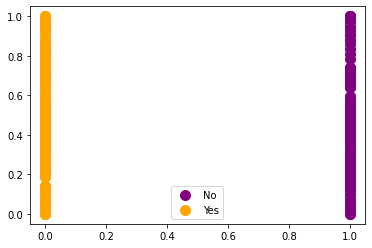

In [13]:
#Visualising the clusters
plt.scatter(x[y_db == 0, 0], x[y_db == 0, 1], s = 100, c = 'purple', label = 'No')
plt.scatter(x[y_db == 1, 0], x[y_db == 1, 1], s = 100, c = 'orange', label = 'Yes')

#Plotting the centroids of the clusters
# plt.scatter(agg.cluster_centers_[:, 0], agg.cluster_centers_[:,1], s = 100, c = 'grey', label = 'Centroids')

plt.legend()


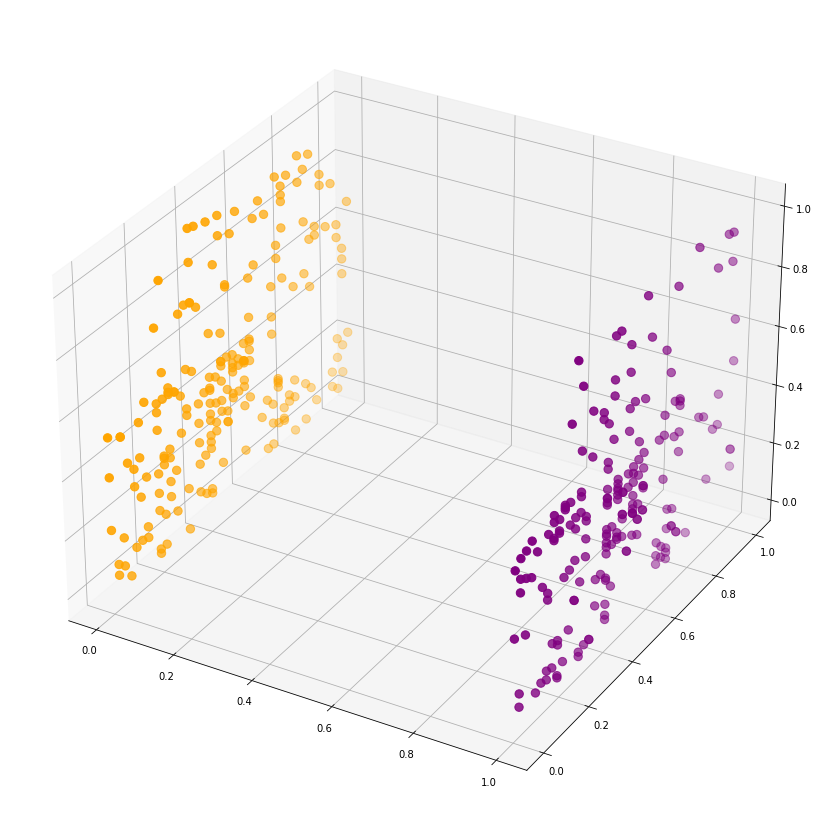

In [14]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x[y_db == 0, 0], x[y_db == 0, 1], x[y_db == 0, 2], s = 70, c = 'purple', marker='o', label='Cluster 1')
ax.scatter(x[y_db == 1, 0], x[y_db == 1, 1], x[y_db == 1, 2], s = 70, c = 'orange', marker='o', label='Cluster 2')
# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 70, c = 'red', label = 'Centroids')

plt.show()

In [15]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y, y_db)
ac = accuracy_score(y,y_db)

In [16]:
print("Accuracy: ", ac)

Accuracy:  0.5175


<AxesSubplot:>

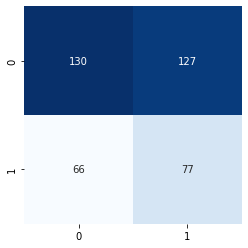

In [17]:
import seaborn as sn
sn.heatmap(cm, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)

### 2. Mall Customers Data

### Read Data

In [28]:
df = pd.read_csv('data/Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [29]:
df.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

### Data Preprocessing

In [30]:
df.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [31]:
df = df.drop(columns = ["CustomerID"])

In [32]:
# Import label encoder
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Genre']= label_encoder.fit_transform(df['Genre'])

In [33]:
# apply minmax scalling
minMaxScaler = preprocessing.MinMaxScaler()
df[df.columns] = minMaxScaler.fit_transform(df[df.columns])

In [34]:
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,0.019231,0.000000,0.387755
1,1.0,0.057692,0.000000,0.816327
2,0.0,0.038462,0.008197,0.051020
3,0.0,0.096154,0.008197,0.775510
4,0.0,0.250000,0.016393,0.397959


In [35]:
x = df.values

### Apply DBSCAN

In [37]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps = 0.5, min_samples = 10)
y_db = db.fit_predict(x)

In [38]:
len(y_db)

200

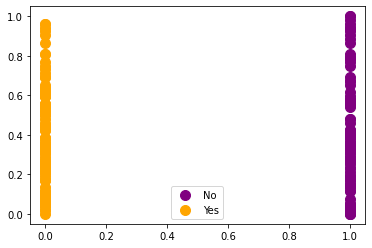

In [39]:
#Visualising the clusters
plt.scatter(x[y_db == 0, 0], x[y_db == 0, 1], s = 100, c = 'purple', label = 'No')
plt.scatter(x[y_db == 1, 0], x[y_db == 1, 1], s = 100, c = 'orange', label = 'Yes')
    
plt.legend()


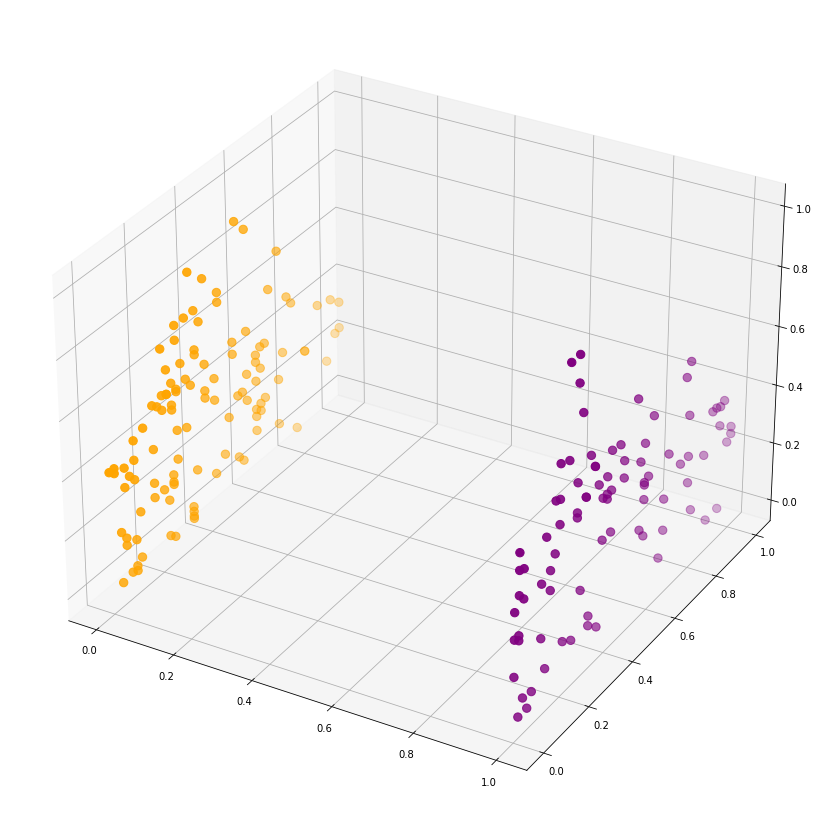

In [40]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x[y_db == 0, 0], x[y_db == 0, 1], x[y_db == 0, 2], s = 70, c = 'purple', marker='o', label='Cluster 1')
ax.scatter(x[y_db == 1, 0], x[y_db == 1, 1], x[y_db == 1, 2], s = 70, c = 'orange', marker='o', label='Cluster 2')

plt.show()

## 13. Implementing Backpropagation Learning Algorithm for Classification

In [12]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [13]:
# Load dataset
data = load_iris()

# Get features and target variables
x=data.data
y=data.target

# Get dummy variable to setup binary classification
y = pd.get_dummies(y).values

y[:3]

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]], dtype=uint8)

In [14]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def mean_squared_error(y_pred, y_true):
    return ((y_pred - y_true)**2).sum() / (2*y_pred.size)
    
def accuracy(y_pred, y_true):
    acc = y_pred.argmax(axis=1) == y_true.argmax(axis=1)
    return acc.mean()

In [15]:
# perform test train split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=20, random_state=4)

# Initialize variables
learning_rate = 0.1
iterations = 15000
N = y_train.size

# number of input features
input_size = 4

# number of hidden layers neurons
hidden_size = 2 

# number of neurons at the output layer
output_size = 3  

# Initialize weights
# np.random.seed(10)

# initializing weight for the hidden layer
W1 = np.random.normal(scale=0.5, size=(input_size, hidden_size))   

# initializing weight for the output layer
W2 = np.random.normal(scale=0.5, size=(hidden_size , output_size)) 

In [16]:
for itr in range(iterations):    
    
    # feedforward propagation
    # on hidden layer
    Z1 = np.dot(x_train, W1)
    A1 = sigmoid(Z1)

    # on output layer
    Z2 = np.dot(A1, W2)
    A2 = sigmoid(Z2)
    
    # Calculating error
    mse = mean_squared_error(A2, y_train)
    acc = accuracy(A2, y_train)
    
    # backpropagation
    E1 = A2 - y_train
    dW1 = E1 * A2 * (1 - A2)
    
    E2 = np.dot(dW1, W2.T)
    dW2 = E2 * A1 * (1 - A1)

    # weight updates
    W2_update = np.dot(A1.T, dW1) / N
    W1_update = np.dot(x_train.T, dW2) / N

    W2 = W2 - learning_rate * W2_update
    W1 = W1 - learning_rate * W1_update

In [17]:
# feedforward
Z1 = np.dot(x_test, W1)
A1 = sigmoid(Z1)

Z2 = np.dot(A1, W2)
A2 = sigmoid(Z2)

acc = accuracy(A2, y_test)
print("Accuracy: {}".format(acc))

Accuracy: 0.2


## 14. Implementing SOM Algorithm for Clustering

In [25]:
# !pip install minisom

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# use Minisom library to implement self orgranising maps
from minisom import MiniSom
# to suppress warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [27]:
# Loading Data
data = pd.read_csv('./Credit_Card_Applications.csv')
data.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [28]:
print(data.shape)

# Seperate input and output variables
x = data.iloc[:, 1:14].values
y = data.iloc[:, -1].values

(690, 16)


In [30]:
# define SOM
som = MiniSom(x = som_grid_rows, y = som_grid_columns, input_len=13, sigma=sigma, learning_rate=learning_rate)

# Initializing the weights
som.random_weights_init(x)

# Training
som.train_random(x, iterations)

# Weights
wts = som._weights

In [31]:
som.distance_map()

array([[0.171542  , 0.37514082, 0.44219932, 0.43306407, 0.34974778,
        0.31535313, 0.36436955, 0.36613606, 0.50512824, 0.19775212],
       [0.32276322, 0.5442339 , 0.55647599, 0.63826895, 0.71109657,
        0.53405455, 0.50762678, 0.58896652, 0.52766897, 0.34308395],
       [0.36061388, 0.58014668, 0.6603848 , 0.79821271, 0.65008191,
        0.87175975, 0.54794228, 0.56364613, 0.5193867 , 0.36860313],
       [0.37159078, 0.55997859, 0.74901108, 0.58012615, 0.8397106 ,
        0.61899341, 0.71079819, 0.50196276, 0.65319995, 0.36943948],
       [0.25429242, 0.69303861, 0.51068077, 0.78870413, 0.69229222,
        0.73538696, 0.4820083 , 0.70274466, 0.58625674, 0.38407556],
       [0.38889509, 0.43571502, 0.56267155, 0.65796476, 0.65049078,
        0.5596785 , 0.52046934, 0.73415457, 0.77873487, 0.42857941],
       [0.27457207, 0.54695955, 0.4623616 , 0.67231051, 0.65611442,
        0.5972829 , 0.57138542, 0.66563946, 0.67083592, 0.28507369],
       [0.3872123 , 0.61596025, 0.7055393

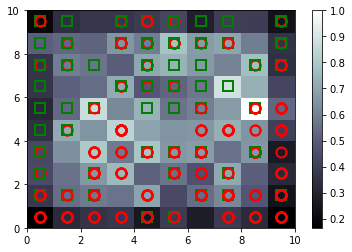

In [32]:
from pylab import plot, axis, show, pcolor, colorbar, bone
bone()
pcolor(som.distance_map().T)
colorbar() #gives legend

markers = ['o', 's']                     # if the observation is fraud then red circular color or else green square
colors = ['r', 'g']
for i, r in enumerate(x):
    w = som.winner(r)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()